In [163]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from cpymad.madx import Madx
from tqdm import tqdm
from pybt.tools.plotters import *
from madxtools.plot_tool import *
from madxtools.air_scattering import *
from madxtools.math import *
def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 14
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [2]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [151]:
filename = 'quad_scan_t8_ion_2023_10_17_17h57m36s'
# filename = 'quad_scan_t8_ion_2023_10_17_18h16m29s'
with open(filename + "/" + filename+".p", 'rb') as f:
    data = pickle.load(f)

In [152]:
data[0] # Datetime
data[1] # Quadrupole Measured Pulse
data[2] # Logical K_FUNC_LIST
data[3] # intensity_list
data[4] # logical_i_dict
data[5] # current_oasis_dict
data[6] # logicalt8_k_dict
data[7] # bpm_dict
data[8] # bpm_profiles_dict
data[9] # blm_dict
data[10] # xsec_dict
data[11] # mwpc_dict
data[12] # blm_st_dict

{'F61.BLM008-ST/Samples': []}

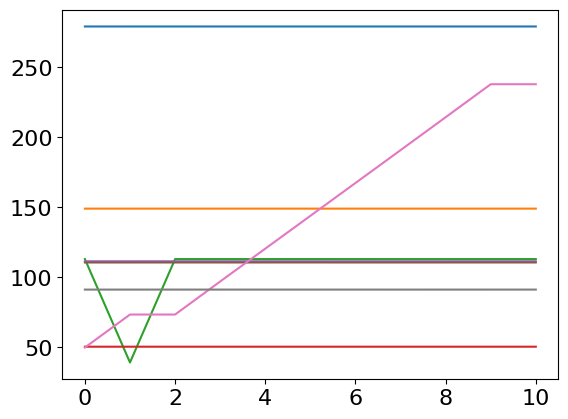

In [153]:
fig, ax = plt.subplots()
for key in data[1].keys():
    ax.plot(data[1][key])

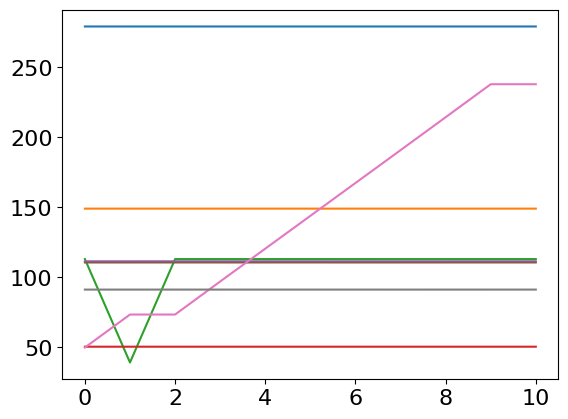

In [154]:
fig, ax = plt.subplots()
for key in data[1].keys():
    ax.plot(data[1][key])

In [155]:
data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainProfilesAcquisition'][0].keys()

dict_keys(['HFitProfile', 'HRawProfile', 'VRawProfile', 'VFitProfile'])

<ErrorbarContainer object of 3 artists>

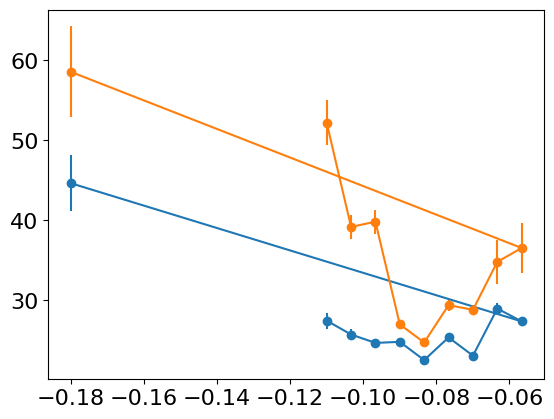

In [194]:
quad_k_value_custom_fit = []
for i in range(len(data[11]["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions"])):
        quad_k_value_custom_fit.append(data[6]['logical.T8.QDN07/K_FUNC_LIST#value'][i][0][1][0])

fig, ax = plt.subplots()

sigH_custom_fit_list = []
perrH_list = []
sigV_custom_fit_list = []
perrV_list = []
for i in range(len(data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainProfilesAcquisition'])):
    
    # Horizontal
    x = data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainProfilesAcquisition'][i]["HRawProfile"][0]
    y = data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainProfilesAcquisition'][i]["HRawProfile"][1]
    popt, pcov = do_gaussian_fit(x,y)

    sigH = popt[3]
    sigH_custom_fit_list.append(sigH)

    perrH = np.sqrt(np.diag(pcov))
    perrH_list.append(perrH[3])

    # Vertical
    x = data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainProfilesAcquisition'][i]["VRawProfile"][0]
    y = data[11]['PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainProfilesAcquisition'][i]["VRawProfile"][1]
    popt, pcov = do_gaussian_fit(x,y)

    sigV = popt[3]
    sigV_custom_fit_list.append(sigV)

    perrV = np.sqrt(np.diag(pcov))
    perrV_list.append(perrV[3])



ax.errorbar(quad_k_value_custom_fit, sigH_custom_fit_list, yerr=perrH_list, marker="o")
ax.errorbar(quad_k_value_custom_fit, sigV_custom_fit_list, yerr=perrV_list, marker="o")

Text(0.5, 1.0, 'Quad Scan MWPC ions 2023\nquad_scan_t8_ion_2023_10_17_18h16m29s')

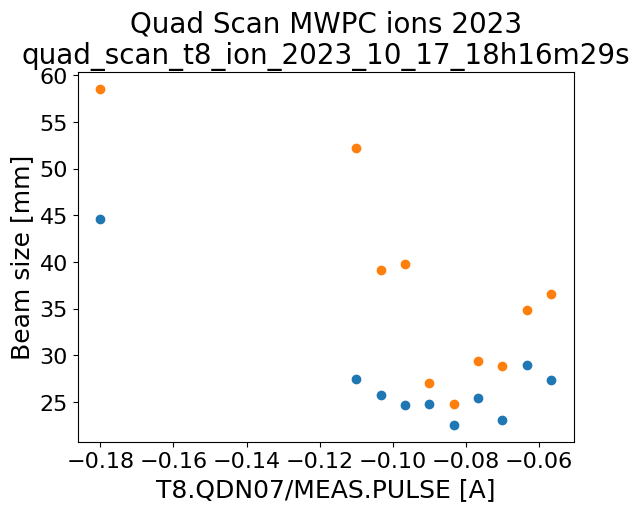

In [195]:
fig, ax = plt.subplots()

quad_k_value = []
mwpc_sigH = []
mwpc_sigV = []
for i in range(len(data[11]["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions"])):
    mwpc_sigH.append(data[11]["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions"][i]["HSigma"])
    mwpc_sigV.append(data[11]["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions"][i]["VSigma"])
    quad_k_value.append(data[6]['logical.T8.QDN07/K_FUNC_LIST#value'][i][0][1][0])

ax.scatter(quad_k_value, mwpc_sigH, label="sigH")
ax.scatter(quad_k_value, mwpc_sigV, label="sigV")

ax.set_xlabel("T8.QDN07/MEAS.PULSE [A]")
ax.set_ylabel("Beam size [mm]")
ax.set_title(f"Quad Scan MWPC ions 2023\n{filename}")

# Compare with the model


In [196]:
data[2]['logical.F61.QFN03/K_FUNC_LIST#value'][1][0][1][0]

0.19864

In [197]:
op_optics = [
    data[2]['logical.F61.QFN01/K_FUNC_LIST#value'][1][0][1][0],
    data[2]['logical.F61.QDN02/K_FUNC_LIST#value'][1][0][1][0],
    data[2]['logical.F61.QFN03/K_FUNC_LIST#value'][1][0][1][0],
    data[2]['logical.F61.QDN04/K_FUNC_LIST#value'][1][0][1][0],
    data[6]['logical.T8.QFN05/K_FUNC_LIST#value'][1][0][1][0],
    data[6]['logical.T8.QDN06/K_FUNC_LIST#value'][1][0][1][0],
    data[6]['logical.T8.QDN07/K_FUNC_LIST#value'][1][0][1][0],
    data[6]['logical.T8.QFN08/K_FUNC_LIST#value'][1][0][1][0],
]

In [198]:
E_cin_per_nucleon = 2.0
# Ion properties
A = 208.0
Z = 82.0
N = 126.0
charge = 54.0
m_proton_GeV = 0.93828
m_neutron_GeV = 0.93957
m_electron_GeV = 0.000511
m_u_GeV = 0.9315
mass_defect_GeV = Z * m_proton_GeV + N * m_neutron_GeV + (Z - charge) * m_electron_GeV - A * m_u_GeV
E_0 = Z * m_proton_GeV + N * m_neutron_GeV - mass_defect_GeV

p = E_0 * np.sqrt((((E_cin_per_nucleon * A) / E_0) + 1) ** 2 - 1)

gamma = p/charge/0.938
beta = np.sqrt(1-gamma**(-2))

# Matched initial parameters 13nd oct 2023
betx0 = 53.074
alfx0 = -13.191
dx0 = 0.13
dpx0 = 0.02
exn = 2.53e-5

bety0 = 3.675
alfy0 = 0.859
dy0 = 0.0
dpy0 = 0.0
eyn = 6.94e-06

sige = 0.0045

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

sigH_list = []
sigV_list = []
k_list = quad_k_value
for k in k_list:
    print(f"k = {k}")
    with open('tempfile', 'w') as f:
        madx = Madx(stdout=f,stderr=f)
        madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

    madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
    madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

    # Optics
    optics = op_optics
    madx.input("kQFN1 = "+str(optics[0])+";")
    madx.input("kQDN2 = "+str(optics[1])+";")
    madx.input("kQFN3 = "+str(optics[2])+";")
    madx.input("kQDN4 = "+str(optics[3])+";")
    madx.input("kQFN5 = "+str(optics[4])+";")
    madx.input("kQDN6 = "+str(optics[5])+";")
    madx.input("kQDN7 = "+str(k)+";")
    madx.input("kQFN8 = "+str(optics[7])+";")

    # Add the Air region
    sequence = "f61t8_op"

    p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
    p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
    add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
    p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
    add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

    #t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
    p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
    add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
    add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
    add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
    add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

    pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
    len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
    pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
    add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

    pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
    len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
    pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
    add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


    # add_hidden_marker(madx, sequence, 20, 100, steps)

    madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
    madx.input('BRHO      := BEAM->PC * 3.3356;')
    madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
    madx.use(sequence=sequence)

    # make thin
    madx.use(sequence="f61t8_op")
    madx.input('SEQEDIT, sequence=f61t8_op;')
    madx.input('FLATTEN;')
    madx.input('ENDEDIT;')
    madx.use(sequence="f61t8_op")
    madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
    # madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
    madx.use(sequence="f61t8_op")


    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

    # plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])

    # Air scattering
    madx.use(sequence=sequence)
    madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
    twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

    instrument_focal_point = "t08.xwcm103"
    sigH = beam_size(twiss_scattered['betx'][instrument_focal_point], twiss_scattered['dx'][instrument_focal_point], twiss_scattered['ex'][instrument_focal_point], sige, 1)
    sigV = beam_size(twiss_scattered['bety'][instrument_focal_point], twiss_scattered['dy'][instrument_focal_point], twiss_scattered['ey'][instrument_focal_point], sige, 1)

    sigH_list.append(sigH)
    sigV_list.append(sigV)

k = -0.18
k = -0.05666666666666667
k = -0.06333333333333334
k = -0.07
k = -0.07666666666666666
k = -0.08333333333333334
k = -0.09
k = -0.09666666666666666
k = -0.10333333333333333
k = -0.11


Text(0.5, 0.98, 'Quad Scan MWPC ions 2023\nquad_scan_t8_ion_2023_10_17_18h16m29s')

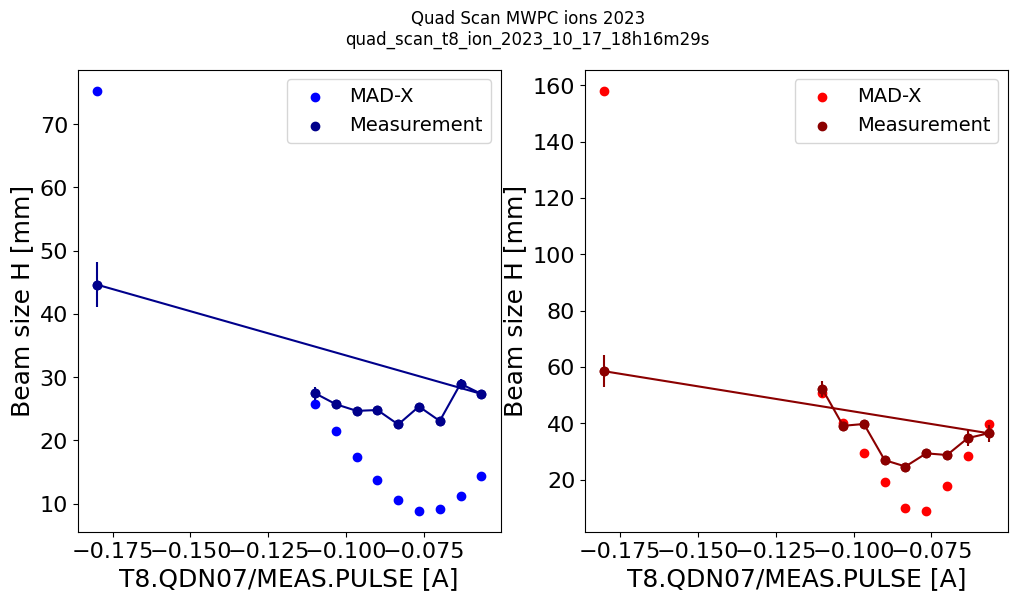

In [202]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].scatter(k_list, np.array(sigH_list)*1000, marker="o", label="MAD-X", c="b")
ax[1].scatter(k_list, np.array(sigV_list)*1000, marker="o", label="MAD-X", c="r")
ax[0].scatter(quad_k_value, mwpc_sigH, label="Measurement", c="darkblue")
ax[1].scatter(quad_k_value, mwpc_sigV, label="Measurement", c="darkred")

ax[0].errorbar(quad_k_value_custom_fit, sigH_custom_fit_list, yerr=perrH_list, marker="o", c="darkblue")
ax[1].errorbar(quad_k_value_custom_fit, sigV_custom_fit_list, yerr=perrV_list, marker="o", c="darkred")

ax[0].legend()
# ax[0].set_xlim(-0.12, -0.05)
# ax[0].set_ylim(0, 60)
ax[0].set_xlabel("T8.QDN07/MEAS.PULSE [A]")
ax[0].set_ylabel("Beam size H [mm]")

ax[1].legend()
# ax[1].set_xlim(-0.12, -0.05)
# ax[1].set_ylim(0, 60)
ax[1].set_xlabel("T8.QDN07/MEAS.PULSE [A]")
ax[1].set_ylabel("Beam size H [mm]")
fig.suptitle(f"Quad Scan MWPC ions 2023\n{filename}")

# Combine the two measurements together

Text(0.5, 1.0, 'Quad Scan MWPC ions 2023\nquad_scan_t8_ion_2023_10_17_18h16m29s')

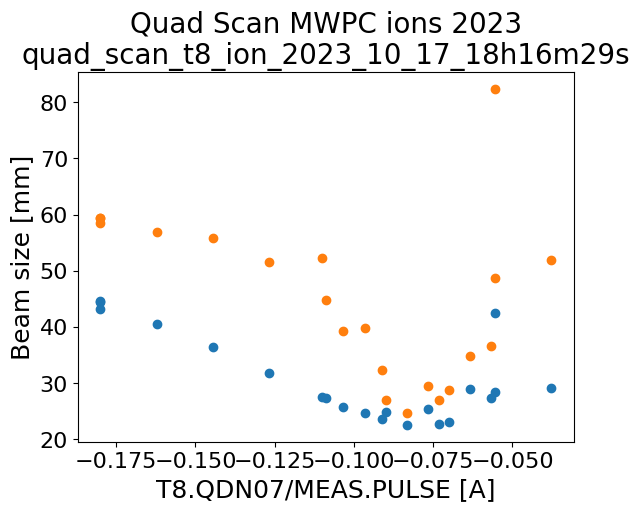

In [190]:
quad_k_value = []
mwpc_sigH = []
mwpc_sigV = []

filenames = ['quad_scan_t8_ion_2023_10_17_17h57m36s', 'quad_scan_t8_ion_2023_10_17_18h16m29s']
for filename in filenames:

    with open(filename + "/" + filename+".p", 'rb') as f:
        data = pickle.load(f)

    for i in range(len(data[11]["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions"])):
        mwpc_sigH.append(data[11]["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions"][i]["HSigma"])
        mwpc_sigV.append(data[11]["PS-LOG-MWPC-UCAP_IRRAD_2080/LowGainPositions"][i]["VSigma"])
        quad_k_value.append(data[6]['logical.T8.QDN07/K_FUNC_LIST#value'][i][0][1][0])


fig, ax = plt.subplots()

ax.scatter(quad_k_value, mwpc_sigH, label="sigH")
ax.scatter(quad_k_value, mwpc_sigV, label="sigV")

ax.set_xlabel("T8.QDN07/MEAS.PULSE [A]")
ax.set_ylabel("Beam size [mm]")
ax.set_title(f"Quad Scan MWPC ions 2023\n{filename}")

In [191]:
E_cin_per_nucleon = 2.0
# Ion properties
A = 208.0
Z = 82.0
N = 126.0
charge = 54.0
m_proton_GeV = 0.93828
m_neutron_GeV = 0.93957
m_electron_GeV = 0.000511
m_u_GeV = 0.9315
mass_defect_GeV = Z * m_proton_GeV + N * m_neutron_GeV + (Z - charge) * m_electron_GeV - A * m_u_GeV
E_0 = Z * m_proton_GeV + N * m_neutron_GeV - mass_defect_GeV

p = E_0 * np.sqrt((((E_cin_per_nucleon * A) / E_0) + 1) ** 2 - 1)

gamma = p/charge/0.938
beta = np.sqrt(1-gamma**(-2))

# Matched initial parameters 13nd oct 2023
betx0 = 53.074
alfx0 = -13.191
dx0 = 0.13
dpx0 = 0.02
exn = 2.53e-5

bety0 = 3.675
alfy0 = 0.859
dy0 = 0.0
dpy0 = 0.0
eyn = 6.94e-06

sige = 0.0045

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

sigH_list = []
sigV_list = []
k_list = quad_k_value
for k in tqdm(k_list, desc="Processing k_list"):
    with open('tempfile', 'w') as f:
        madx = Madx(stdout=f,stderr=f)
        madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

    madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
    madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

    # Optics
    optics = op_optics
    madx.input("kQFN1 = "+str(optics[0])+";")
    madx.input("kQDN2 = "+str(optics[1])+";")
    madx.input("kQFN3 = "+str(optics[2])+";")
    madx.input("kQDN4 = "+str(optics[3])+";")
    madx.input("kQFN5 = "+str(optics[4])+";")
    madx.input("kQDN6 = "+str(optics[5])+";")
    madx.input("kQDN7 = "+str(k)+";")
    madx.input("kQFN8 = "+str(optics[7])+";")

    # Add the Air region
    sequence = "f61t8_op"

    p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
    p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
    add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
    p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
    add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

    #t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
    p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
    add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
    add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
    add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

    p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
    p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
    add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

    pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
    len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
    pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
    add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

    pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
    len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
    pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
    add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


    # add_hidden_marker(madx, sequence, 20, 100, steps)

    madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
    madx.input('BRHO      := BEAM->PC * 3.3356;')
    madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
    madx.use(sequence=sequence)

    # make thin
    madx.use(sequence="f61t8_op")
    madx.input('SEQEDIT, sequence=f61t8_op;')
    madx.input('FLATTEN;')
    madx.input('ENDEDIT;')
    madx.use(sequence="f61t8_op")
    madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
    # madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
    madx.use(sequence="f61t8_op")


    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()

    # plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])

    # Air scattering
    madx.use(sequence=sequence)
    madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
    twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=dx0, Dy=dy0, Dpx=dpx0, Dpy=dpy0).dframe()
    twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

    instrument_focal_point = "t08.xwcm103"
    sigH = beam_size(twiss_scattered['betx'][instrument_focal_point], twiss_scattered['dx'][instrument_focal_point], twiss_scattered['ex'][instrument_focal_point], sige, 1)
    sigV = beam_size(twiss_scattered['bety'][instrument_focal_point], twiss_scattered['dy'][instrument_focal_point], twiss_scattered['ey'][instrument_focal_point], sige, 1)

    sigH_list.append(sigH)
    sigV_list.append(sigV)

Processing k_list: 100%|██████████| 21/21 [00:24<00:00,  1.18s/it]


Text(0.5, 0.98, "Quad Scan MWPC ions 2023\n['quad_scan_t8_ion_2023_10_17_17h57m36s', 'quad_scan_t8_ion_2023_10_17_18h16m29s']")

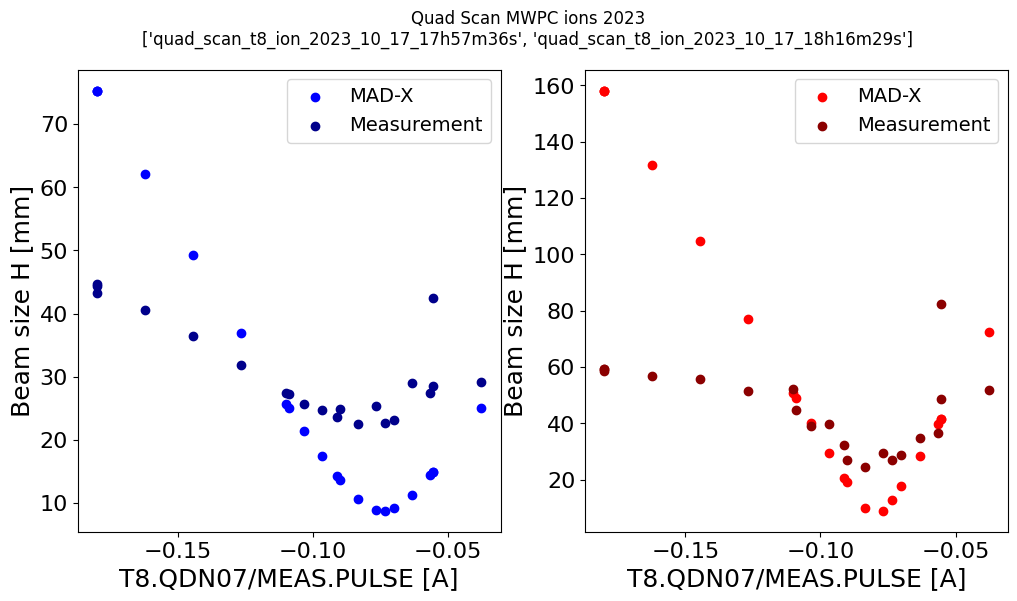

In [192]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].scatter(k_list, np.array(sigH_list)*1000, marker="o", label="MAD-X", c="b")
ax[1].scatter(k_list, np.array(sigV_list)*1000, marker="o", label="MAD-X", c="r")
ax[0].scatter(quad_k_value, mwpc_sigH, label="Measurement", c="darkblue")
ax[1].scatter(quad_k_value, mwpc_sigV, label="Measurement", c="darkred")

ax[0].legend()
# ax[0].set_xlim(-0.12, -0.05)
# ax[0].set_ylim(0, 60)
ax[0].set_xlabel("T8.QDN07/MEAS.PULSE [A]")
ax[0].set_ylabel("Beam size H [mm]")

ax[1].legend()
# ax[1].set_xlim(-0.12, -0.05)
# ax[1].set_ylim(0, 60)
ax[1].set_xlabel("T8.QDN07/MEAS.PULSE [A]")
ax[1].set_ylabel("Beam size H [mm]")
fig.suptitle(f"Quad Scan MWPC ions 2023\n{filenames}")